Found 1900 images belonging to 38 classes.


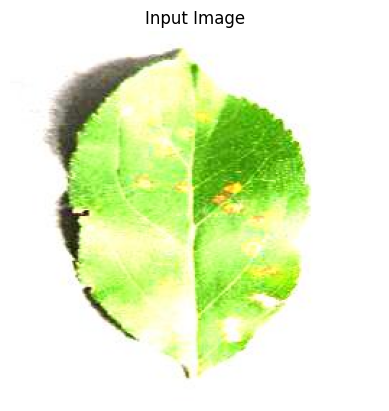

1/1 [==============================] - 2s 2s/step
Predicted class index: 0
Predicted disease: Apple__Apple_scab


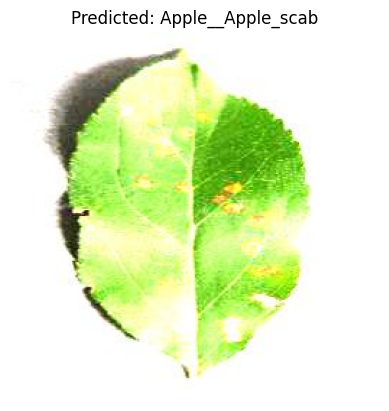

In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

# 1) Settings must match your training preprocessing
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# 2) Load class names (must point at the same valid folder you used in training)
val_datagen = ImageDataGenerator(rescale=1./255)
validation_set = val_datagen.flow_from_directory(
    r"D:\Major Project\dataset\valid",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
class_names = list(validation_set.class_indices.keys())

# 3) Load your saved MobileNetV2 model
cnn = tf.keras.models.load_model(r"D:\Major Project\trained_plant_disease_model_mobilenetv2.h5")

# 4) Prepare the single test image
image_path = r"D:\Major Project\dataset\test\dummy\AppleCedarRust1.JPG"
# Read & display
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img); plt.title("Input Image"); plt.axis('off'); plt.show()

# Resize + normalize
image = tf.keras.preprocessing.image.load_img(image_path, target_size=IMAGE_SIZE)
input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255.0
input_arr = np.expand_dims(input_arr, axis=0)

# 5) Predict
preds = cnn.predict(input_arr)
idx = np.argmax(preds[0])
print("Predicted class index:", idx)
print("Predicted disease:", class_names[idx])

# 6) Show result (without confidence percentage)
plt.imshow(img)
plt.title(f"Predicted: {class_names[idx]}")
plt.axis('off')
plt.show()
